In [1]:
import os # 處理字符串路徑
import random
import zipfile # 內建標準庫提供做壓縮與解壓縮用
import matplotlib.pyplot as plt # plt用於顯示圖片
import matplotlib.image as mpimg # mpimg 用於讀取圖片
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
seed = 7
np.random.seed(seed)

In [4]:
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [5]:
# 使用wget指令，可從連結中下載檔案至指定位置

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /cats_and_dogs_filtered.zip # 若要指定下載檔案儲存在硬碟中的檔名，可以使用 -O 參數

/cats_and_dogs_filtered.zip: Read-only file system


In [6]:
# os.path.join()： 將多個路徑組合後返回
# os.listdir()： 方法用於返回指定的文件夾包含的文件或文件夾的名字的列表。這個列表以字母順序。

In [7]:
local_zip = 'cats_and_dogs_filtered.zip' # 把載下的資料帶入local_zip
zip_ref = zipfile.ZipFile(local_zip, 'r') # 讀取資料夾中的資料
zip_ref.extractall('Pics') # 解壓縮的目的路徑
zip_ref.close() # 關閉資料夾

In [8]:
# 取得資料集路徑
base_dir = 'Pics/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train') #連結目錄與文件名
validation_dir = os.path.join(base_dir, 'validation')

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')           # 取得訓練用貓圖片的路徑
train_dogs_dir = os.path.join(train_dir, 'dogs')           # 取得訓練用狗圖片的路徑
validation_cats_dir = os.path.join(validation_dir, 'cats') # 取得驗證用貓圖片的路徑
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 取得驗證用狗圖片的路徑

In [10]:
train_cat_fnames = os.listdir(train_cats_dir)              # 取得訓練用所有貓圖片
train_dog_fnames = os.listdir(train_dogs_dir)              # 取得訓練用所有狗圖片
validation_cat_fnames = os.listdir(validation_cats_dir)    # 取得驗證用所有貓圖片
validation_dog_fnames = os.listdir(validation_dogs_dir)    # 取得驗用所有狗圖片

print(train_cat_fnames[0])
print(train_cat_fnames[1])
print(train_cat_fnames[2])

cat.952.jpg
cat.946.jpg
cat.6.jpg


In [11]:
nrows = 4 # 設定顯示列數(row)及行數(col)
ncols = 3 # 圖像索引編號
pic_index = 0 # 設定繪圖參數使其可容納4x3張圖像

In [12]:
# 設定下一次顯示圖像內容，貓狗各6張
pic_index += 6 # 決定要顯示幾張照片
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-6:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-6:pic_index]]

print(next_cat_pix)

['Pics/cats_and_dogs_filtered/train/cats/cat.952.jpg', 'Pics/cats_and_dogs_filtered/train/cats/cat.946.jpg', 'Pics/cats_and_dogs_filtered/train/cats/cat.6.jpg', 'Pics/cats_and_dogs_filtered/train/cats/cat.749.jpg', 'Pics/cats_and_dogs_filtered/train/cats/cat.991.jpg', 'Pics/cats_and_dogs_filtered/train/cats/cat.985.jpg']


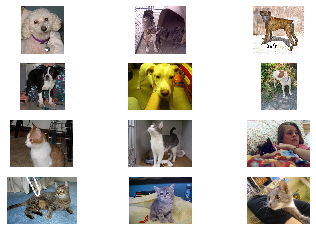

In [13]:
# 將取得圖像內容繪製至容器中 
for i, img_path in enumerate(next_dog_pix+next_cat_pix): 
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # 取消軸標示及格線
  img = mpimg.imread(img_path) # 讀取img_path路徑下的圖片
  plt.imshow(img) # 顯示圖片
    
plt.show() # 顯示結果

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

from keras.models import Sequential
from tensorflow import keras
import tensorflow as tf

In [15]:
print(tf.__version__)

2.0.0


In [16]:
model_2 = tf.keras.Sequential()

model_2.add(layers.Conv2D(16,(3,3),
                 strides=(1,1),
                 input_shape=(150, 150, 3),
                 padding='valid',
                 activation='relu',
                 ))

model_2.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model_2.add(layers.Conv2D(32,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model_2.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model_2.add(layers.Conv2D(64,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model_2.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(512,activation='relu'))

model_2.add(layers.Dropout(0.2))

model_2.add(layers.Dense(1,activation='sigmoid'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

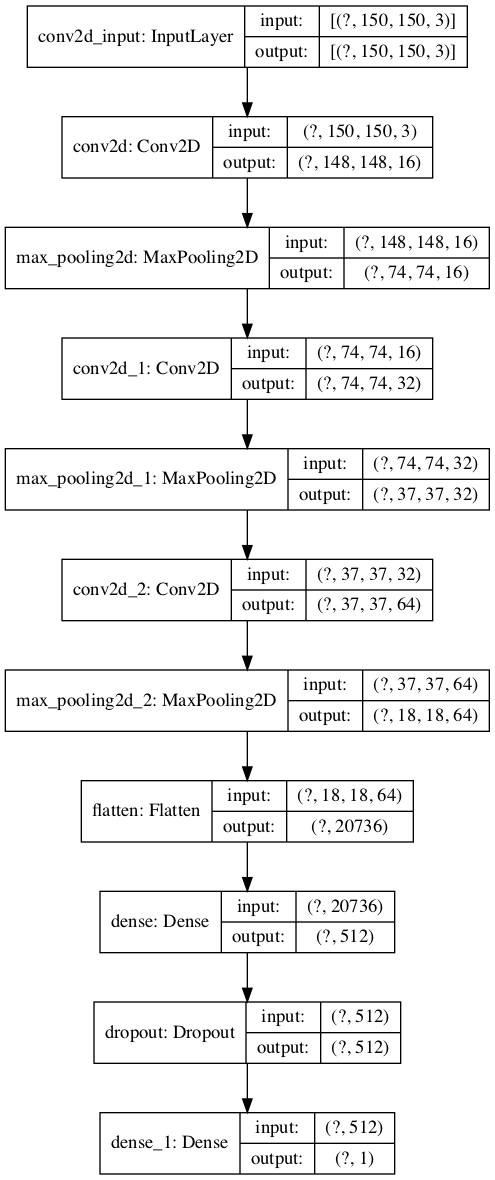

In [17]:
keras.utils.plot_model(model_2, 'my_first_model.png', show_shapes=True)

In [18]:
from keras.models import Model
from keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [19]:
model = Sequential()
# 第一層
# Conv2D以 2的四次方 16組 3X3 kernal 
# strides每次移動步伐是1X1
# input_shape輸入圖像的格式是150X150X3
# activation使用的激活函數
model.add(Conv2D(16,(3,3),strides=(1,1),input_shape=(150, 150, 3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))

# 第二層
# Conv2D以2的五次方 32組 3X3 kernal 
# strides每次移動步伐是1X1
# input_shape輸入圖像的格式是150X150X3
# activation使用的激活函數
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))

# 第三層
# Conv2D以2的六次方 64組 3X3 kernal 
# strides每次移動步伐是1X1
# input_shape輸入圖像的格式是150X150X3
# activation使用的激活函數
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))

# 第四層
# 平坦化
model.add(Flatten())

# 第五層
# 全連接層 512 1X1 kernal 
model.add(Dense(512,activation='relu'))

# 第五層
# 全連接層 512 1X1 kernal
model.add(Dense(1, activation='sigmoid'))
          
# model.add(Dropout(0.5))
# model.add(Dense(4096,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1000,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [20]:
from keras.optimizers import RMSprop

model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

print('rmsprop自動學習速率調速設置！done！')

rmsprop自動學習速率調速設置！done！


In [21]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

print('rmsprop自動學習速率調速設置！done！')

rmsprop自動學習速率調速設置！done！


In [22]:
# zca_whitening 對輸入數據施加ZCA白化
# rotation_range 數據提升時圖片隨機轉動的角度
# width_shift_range 圖片寬度的某個比例，數據提升時圖片水平偏移的幅度
# shear_range 剪切強度（逆時針方向的剪切變換角度）
# zoom_range 隨機縮放的幅度
# horizontal_flip 進行隨機水平翻轉
# fill_mode ‘constant’，‘nearest’，‘reflect’或‘wrap’之一，當進行變換時超出邊界的點將根據本參數給定的方法進行處理

datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
print('rescale！done!')

rescale！done!


In [24]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
print('resize！done!')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
resize！done!


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=70,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=30,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15


In [ ]:
history = model_2.fit_generator(
      train_generator,
      steps_per_epoch=70,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=30,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
# 隨機從img_files_1或img_files_2路徑挑選一個
validation = 'C&D/cats_and_dogs_filtered/validation'

img_files_1 = [os.path.join(validation_cats_dir, f) for f in validation_cat_fnames]
img_files_2 = [os.path.join(validation_dogs_dir, f) for f in validation_dog_fnames]
img_path = random.choice(img_files_1 + img_files_2)

# 讀入待測試圖像並秀出
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
plt.title(img_path)
plt.grid(False)
plt.imshow(img)

# 將圖像轉成模型可分析格式(150x150x3, float32)
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255 # Rescale by 1/255

import time
start = time.time() # 啟動計時器

result = model_2.predict(x) # 對輸入圖像進行推論(預測)
finish = time.time() # 結束計時器

print ("Result = %f" %result) # 印出結果可能機率值(0.0 ~ 1.0)
print("Test time :%f second." %(finish-start)) # 印出推論時間

#設定分類門檻值並印出推論結果
print("有 %.2f%%的機率為狗" %(result * 100)) # 印出推論時間